In [1]:
import argparse
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pyplot as plt

In [3]:
coverage_files = ['/home/user/profuzzbench/output/out-ft-TLS-OpenSSL-7b649c7-1-1723958703/coverage.csv', 
                  '/home/user/profuzzbench/output/out-ft-TLS-OpenSSL-7b649c7-2-1723958703/coverage.csv']
cut_off = 60
step = 1
out_file = 'test.csv'

In [19]:
df = pd.read_csv(file)
    
# Convert the 'time' column to datetime, where time is in seconds
df['time'] = pd.to_datetime(df['time'], unit='s')

# Truncate the 'time' column to the minute
df['time'] = df['time'].dt.floor('min')
df.groupby(by='time').apply(lambda d: d.iloc[-1], include_groups=False).reset_index()


,time,l_per,l_abs,b_per,b_abs
0,2024-08-18 05:24:00,24791.0,14.0047,10385.0,9.5276
1,2024-08-18 05:25:00,24916.0,14.0753,10468.0,9.6038


In [4]:
# Initialize an empty list to hold dataframes
df_list = []

if not step:
    step = 1
    
if not cut_off:
    cut_off = 60
    
if not out_file:
    out_file = "coverage.jpg"

# Loop through each coverage file
for i, file in enumerate(coverage_files):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Convert the 'time' column to datetime, where time is in seconds
    df['time'] = pd.to_datetime(df['time'], unit='s')
    
    # Truncate the 'time' column to the minute
    df['time'] = df['time'].dt.floor('min')
    df = df.groupby(by='time').apply(lambda d: d.iloc[-1]).reset_index(drop=True)
    start_time = df['time'].iloc[0]
    end_time = start_time + pd.Timedelta(minutes=cut_off * step)
    time_range = pd.date_range(start=start_time, end=end_time, freq='min')
    df = df.set_index('time').reindex(time_range).ffill().reset_index(names="time")
    df['time'] = (df['time'] - start_time).dt.total_seconds() / 60
    df['time'] = df['time'].astype(int)
    df['run'] = i + 1
    df['run'] = df['run'].astype(int)
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(df_list, ignore_index=True)

/tmp/ipykernel_84/49993750.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(by='time').apply(lambda d: d.iloc[-1]).reset_index(drop=True)
/tmp/ipykernel_84/49993750.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(by='time').apply(lambda d: d.iloc[-1]).reset_index(drop=True)


Text(0.5, 1.0, 'Line Coverage Count')

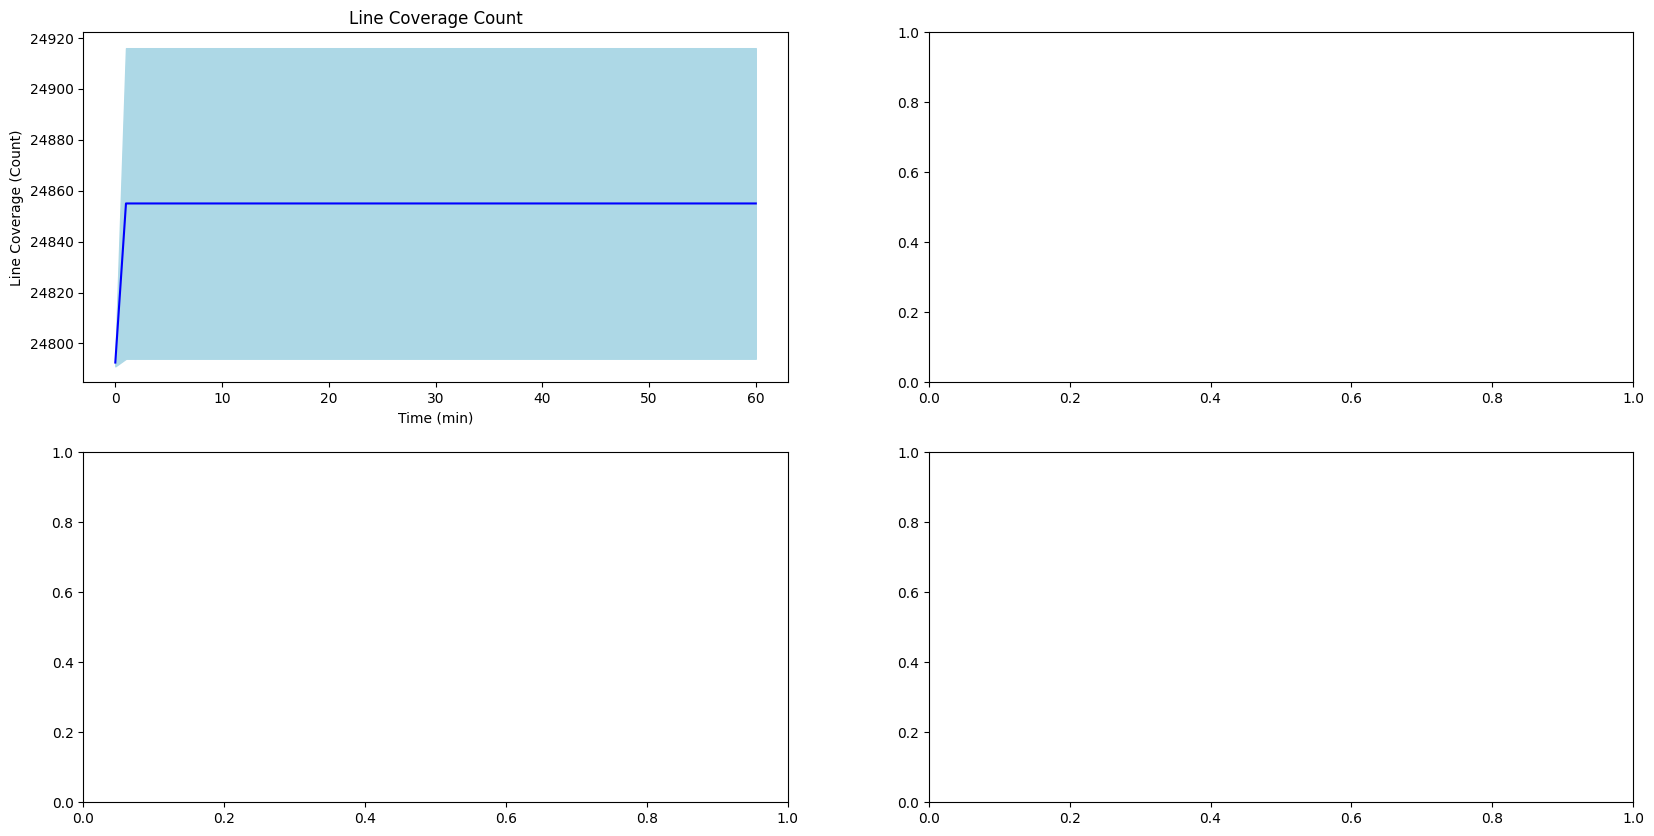

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
ax = axs[0, 0]

df = combined_df[['time', 'l_per']]
df = df.reset_index(drop=True)
min_coverage = df.groupby('time').min().squeeze()
max_coverage = df.groupby('time').max().squeeze()
mean_coverage = df.groupby('time').mean().squeeze()
times = df['time'].drop_duplicates().sort_values()
ax.fill_between(times, min_coverage, max_coverage, color='lightblue')
ax.plot(times, mean_coverage, color='blue')
ax.set_xlabel('Time (min)')
ax.set_ylabel('Line Coverage (Count)')
ax.set_title('Line Coverage Count')